### Este script es una red neuronal feedforward que predice datos de supernovas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [ ]:
# Cargar y ordenar los datos
name_pantheon_tr = ['z', 'mu']
data_pantheon_tr = pd.read_csv('pantheon_train.csv', names=name_pantheon_tr)
data_pantheon_tr = data_pantheon_tr.sort_values(by='z', ascending=True)

# Extraer las columnas z y mu
z = data_pantheon_tr['z'].values
mu = data_pantheon_tr['mu'].values

# División de los datos en entrenamiento y prueba (80-20)
z_train, z_test, mu_train, mu_test = train_test_split(z, mu, test_size=0.2, random_state=42)

# Normalización de los datos
scaler_z = StandardScaler()
scaler_mu = StandardScaler()
z_train = scaler_z.fit_transform(z_train.reshape(-1, 1))
z_test = scaler_z.transform(z_test.reshape(-1, 1))
mu_train = scaler_mu.fit_transform(mu_train.reshape(-1, 1))
mu_test = scaler_mu.transform(mu_test.reshape(-1, 1))

In [1]:
# Definición de la red neuronal con 5 capas ocultas
model = Sequential()
model.add(Dense(64, input_shape=(1,), activation=tf.math.log_sigmoid))  # Capa de entrada con 128 neuronas
model.add(Dense(64, activation=tf.math.log_sigmoid))  # Capa oculta 1
model.add(Dense(64, activation=tf.math.log_sigmoid))  # Capa oculta 2
model.add(Dense(64, activation=tf.math.log_sigmoid))  # Capa oculta 3
model.add(Dense(64, activation=tf.math.log_sigmoid))  # Capa oculta 4
model.add(Dense(64, activation=tf.math.log_sigmoid))  # Capa oculta 5
model.add(Dense(1, activation='linear'))              # Capa de salida

# Compilación del modelo
initial_learning_rate = 0.001
model.compile(optimizer=Adam(learning_rate=initial_learning_rate), loss='mse')

# Callback para reducir el learning rate si la pérdida de validación no mejora
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-8, verbose=1)

# Entrenamiento del modelo con el callback
history = model.fit(z_train, mu_train, epochs=500, batch_size=1, validation_split=0.2, verbose=0, callbacks=[reduce_lr])

# Predicciones en el conjunto de prueba
mu_pred = model.predict(z_test)
mu_pred = scaler_mu.inverse_transform(mu_pred)

/Users/benx/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 26: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 51: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 80: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.

Epoch 112: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.

Epoch 129: ReduceLROnPlateau reducing learning rate to 3.125000148429535e-05.

Epoch 140: ReduceLROnPlateau reducing learning rate to 1.5625000742147677e-05.

Epoch 151: ReduceLROnPlateau reducing learning rate to 7.812500371073838e-06.

Epoch 161: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 171: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 181: ReduceLROnPlateau reducing learning rate to 9.765625463842298e-07.

Epoch 191: ReduceLROnPlateau reducing learning rate to 4.882812731921149e-07.

Epoch 201: ReduceLROnPlateau reducing learning rate to 2.4414063659605745e-07.

Epoch 211: ReduceLROnPlateau reducing learning rate 

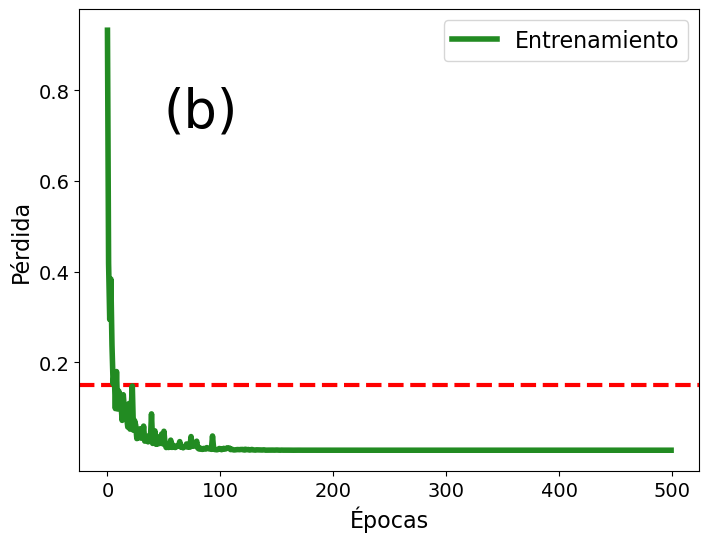

In [2]:
# Gráfica de la función de costo vs. épocas
plt.figure(figsize=(8, 6))
plt.axhline(y=1.5e-1, color='red', lw=3,linestyle='--')  # Línea punteada en y=0.2
plt.plot(history.history['loss'], color='forestgreen', lw=4, label='Entrenamiento')
plt.xlabel('Épocas', fontsize=16)
plt.ylabel('Pérdida', fontsize=16)
plt.text(50, 0.72, r'(b)', fontsize=38, color='k')
custom_ticks = [0.2,0.4,0.6,0.8]
plt.yticks(custom_ticks, custom_ticks, fontsize=14)
plt.xticks(fontsize=14)

#plt.yscale('log')  # Escala logarítmica para la pérdida
plt.legend(fontsize=16)
plt.savefig('CostoFFNNInciso.png')
plt.show()


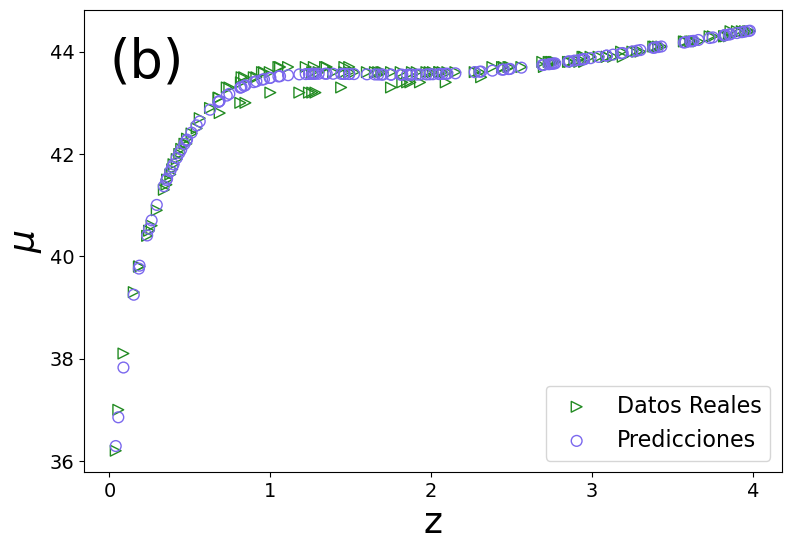

In [9]:
# Gráfica de z vs mu (Datos reales y Predicciones)
plt.figure(figsize=(9, 6))
plt.scatter(scaler_z.inverse_transform(z_test), scaler_mu.inverse_transform(mu_test),marker='>',facecolors='none', edgecolors='forestgreen',color='yellowgreen', s=60,label='Datos Reales')
plt.scatter(scaler_z.inverse_transform(z_test), mu_pred, color='violet', marker='o', facecolors='none', edgecolors='mediumslateblue',  s=60, label='Predicciones')
plt.xlabel('z', fontsize=26)
plt.ylabel('$\mu$', fontsize=26)
plt.text(0, 43.5, r'(b)', fontsize=38, color='k')
custom_yticks = [36,38,40,42,44]
custom_xticks = [0,1,2,3,4]
plt.yticks(custom_yticks, custom_yticks, fontsize=14)
plt.xticks(custom_xticks, custom_xticks, fontsize=14)
#plt.yscale('log')  # Escala lotarítmica para la pérdida
plt.legend(loc='best',fontsize=16)
#plt.title('Predicciones FFNN')
plt.savefig('FFNN-SNIaInciso.png')
plt.show()


### 